In [1]:
cd ..

/home/user/Documents/workspace/projects/accident-prediction-montreal


In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', -1)

# import the file

In [3]:
file_path = "data/Accidents_2012_2017/Accidents_2012_2017.csv"
df = pd.read_csv(file_path)
print(list(df.columns))
print("nb entries: ", len(df.index))

['NO_SEQ_COLL', 'JR_SEMN_ACCDN', 'DT_ACCDN', 'CD_MUNCP', 'NO_CIVIQ_ACCDN', 'SFX_NO_CIVIQ_ACCDN', 'BORNE_KM_ACCDN', 'RUE_ACCDN', 'TP_REPRR_ACCDN', 'ACCDN_PRES_DE', 'NB_METRE_DIST_ACCD', 'CD_GENRE_ACCDN', 'CD_SIT_PRTCE_ACCDN', 'CD_ETAT_SURFC', 'CD_ECLRM', 'CD_ENVRN_ACCDN', 'NO_ROUTE', 'CD_CATEG_ROUTE', 'CD_ETAT_CHASS', 'CD_ASPCT_ROUTE', 'CD_LOCLN_ACCDN', 'CD_POSI_ACCDN', 'CD_CONFG_ROUTE', 'CD_ZON_TRAVX_ROUTR', 'CD_PNT_CDRNL_ROUTE', 'CD_PNT_CDRNL_REPRR', 'CD_COND_METEO', 'NB_VEH_IMPLIQUES_ACCDN', 'NB_MORTS', 'NB_BLESSES_GRAVES', 'NB_BLESSES_LEGERS', 'HEURE_ACCDN', 'AN', 'NB_VICTIMES_TOTAL', 'GRAVITE', 'REG_ADM', 'MRC', 'nb_automobile_camion_leger', 'nb_camionLourd_tractRoutier', 'nb_outil_equipement', 'nb_tous_autobus_minibus', 'nb_bicyclette', 'nb_cyclomoteur', 'nb_motocyclette', 'nb_taxi', 'nb_urgence', 'nb_motoneige', 'nb_VHR', 'nb_autres_types', 'nb_veh_non_precise', 'NB_DECES_PIETON', 'NB_BLESSES_PIETON', 'NB_VICTIMES_PIETON', 'NB_DECES_MOTO', 'NB_BLESSES_MOTO', 'NB_VICTIMES_MOTO', '

In [4]:
print("nb columns:", len(list(df.columns)))
col_to_del = ['NO_SEQ_COLL', 'NO_CIVIQ_ACCDN', 'SFX_NO_CIVIQ_ACCDN', \
              'NO_CIVIQ_ACCDN', 'MRC', 'TP_REPRR_ACCDN', 'RUE_ACCDN', \
              'CD_PNT_CDRNL_ROUTE', 'NB_METRE_DIST_ACCD', \
              'BORNE_KM_ACCDN', 'CD_PNT_CDRNL_REPRR', \
              'CD_POSI_ACCDN', 'CD_LOCLN_ACCDN', 'LOC_X', \
              'LOC_Y', 'LOC_DETACHEE', 'LOC_IMPRECISION', \
              'LOC_COTE_QD', 'LOC_COTE_PD', 'ACCDN_PRES_DE', 'NO_ROUTE']

df = df.drop(col_to_del, axis=1)
print("nb columns:", len(list(df.columns)))
df = df.dropna(how='all', axis=1)
print("nb columns after dropna:", len(list(df.columns)))

nb columns: 68
nb columns: 48
nb columns after dropna: 48


In [5]:
print(list(df.columns))

['JR_SEMN_ACCDN', 'DT_ACCDN', 'CD_MUNCP', 'CD_GENRE_ACCDN', 'CD_SIT_PRTCE_ACCDN', 'CD_ETAT_SURFC', 'CD_ECLRM', 'CD_ENVRN_ACCDN', 'CD_CATEG_ROUTE', 'CD_ETAT_CHASS', 'CD_ASPCT_ROUTE', 'CD_CONFG_ROUTE', 'CD_ZON_TRAVX_ROUTR', 'CD_COND_METEO', 'NB_VEH_IMPLIQUES_ACCDN', 'NB_MORTS', 'NB_BLESSES_GRAVES', 'NB_BLESSES_LEGERS', 'HEURE_ACCDN', 'AN', 'NB_VICTIMES_TOTAL', 'GRAVITE', 'REG_ADM', 'nb_automobile_camion_leger', 'nb_camionLourd_tractRoutier', 'nb_outil_equipement', 'nb_tous_autobus_minibus', 'nb_bicyclette', 'nb_cyclomoteur', 'nb_motocyclette', 'nb_taxi', 'nb_urgence', 'nb_motoneige', 'nb_VHR', 'nb_autres_types', 'nb_veh_non_precise', 'NB_DECES_PIETON', 'NB_BLESSES_PIETON', 'NB_VICTIMES_PIETON', 'NB_DECES_MOTO', 'NB_BLESSES_MOTO', 'NB_VICTIMES_MOTO', 'NB_DECES_VELO', 'NB_BLESSES_VELO', 'NB_VICTIMES_VELO', 'VITESSE_AUTOR', 'LOC_LONG', 'LOC_LAT']


In [6]:
for col in df.columns:
    print(col, " values:", df[col].unique(), "\n")

JR_SEMN_ACCDN  values: ['ME' 'SA' 'JE' 'LU' 'MA' 'DI' 'VE'] 

DT_ACCDN  values: ['2012/02/01' '2012/06/02' '2012/06/28' ... '2017/11/09' '2017/11/13'
 '2017/12/11'] 

CD_MUNCP  values: [66102. 66023. 66142. 66097. 66087. 66092. 43027. 66047. 66117. 25213.
 66007. 61020. 66058. 66062. 66032. 66072. 67025. 65005. 63023. 50072.
 31084. 61005. 71025. 60013. 66107. 66112. 66127. 30105. 23027. 16013.
 82030. 70052. 53052. 88055. 36033. 37067. 94210. 64008. 54090. 85025.
 60040. 59020. 89008. 33070. 70022. 74005.  1023. 71083. 41098. 58037.
 58007. 59010. 84065. 75017. 81017. 60025. 60028. 32040.  5032. 16023.
 57005. 79037. 55023. 50023.    nan  9005. 60020. 67015. 78120.] 

CD_GENRE_ACCDN  values: [31. 59. nan 40. 42. 41. 34. 75. 32. 43. 50. 52. 33. 54. 99. 38. 53. 49.
 71. 72. 48. 39. 74. 45. 37. 46. 44. 36. 51. 47. 35. 73. 55.] 

CD_SIT_PRTCE_ACCDN  values: [nan  1.  9.  3.  2.] 

CD_ETAT_SURFC  values: [16. 11. 12. 18. 15. 17. nan 19. 14. 13. 99. 20.] 

CD_ECLRM  values: [ 1.  3. nan  2.

In [7]:
numerical_cols = ['NB_VICTIMES_VELO', 'nb_automobile_camion_leger',
                'nb_camionLourd_tractRoutier',
                'nb_outil_equipement',
                'nb_tous_autobus_minibus',
                'nb_bicyclette',
                'nb_cyclomoteur',
                'nb_motocyclette',
                'nb_veh_non_precise',
                'nb_urgence',
                'nb_motoneige',
                'nb_VHR',
                'nb_autres_types',
                'nb_veh_non_precise', 
                'NB_MORTS',
                'NB_BLESSES_GRAVES',
                'NB_BLESSES_GRAVES',
                'NB_BLESSES_LEGERS',
                'NB_VICTIMES_TOTAL',
                'NB_VEH_IMPLIQUES_ACCDN',
                'NB_DECES_PIETON',
                'NB_BLESSES_PIETON',
                'NB_VICTIMES_PIETON',
                'NB_DECES_MOTO',
                'NB_BLESSES_MOTO',
                'NB_DECES_VELO',
                'NB_BLESSES_VELO',
                'NB_VICTIMES_VELO',
                'nb_taxi']
coords = ['LOC_LAT', 'LOC_LONG']

In [8]:
df[numerical_cols].describe()

,NB_VICTIMES_VELO,nb_automobile_camion_leger,nb_camionLourd_tractRoutier,nb_outil_equipement,nb_tous_autobus_minibus,nb_bicyclette,nb_cyclomoteur,nb_motocyclette,nb_veh_non_precise,nb_urgence,...,NB_VEH_IMPLIQUES_ACCDN,NB_DECES_PIETON,NB_BLESSES_PIETON,NB_VICTIMES_PIETON,NB_DECES_MOTO,NB_BLESSES_MOTO,NB_DECES_VELO,NB_BLESSES_VELO,NB_VICTIMES_VELO,nb_taxi
count,149886.000000,149886.000000,149886.000000,149886.000000,149886.000000,149886.000000,149886.000000,149886.000000,149886.000000,149886.000000,...,149886.000000,149886.000000,149886.000000,149886.000000,149886.000000,149886.000000,149886.000000,149886.000000,149886.000000,149886.000000
mean,0.029082,1.467008,0.093231,0.013050,0.024692,0.039056,0.006358,0.012990,0.224951,0.031551,...,1.954686,0.000574,0.047229,0.047803,0.000067,0.007299,0.000147,0.028935,0.029082,0.036001
std,0.168790,0.772014,0.301526,0.114075,0.157405,0.195307,0.080236,0.114985,0.420386,0.184349,...,0.572410,0.024224,0.220972,0.222384,0.008168,0.089552,0.012114,0.168380,0.168790,0.192735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,30.000000,3.000000,2.000000,3.000000,7.000000,2.000000,3.000000,5.000000,4.000000,...,31.000000,2.000000,4.000000,4.000000,1.000000,3.000000,1.000000,2.000000,2.000000,7.000000


correlation between numerical values

In [9]:
corr = df[numerical_cols].corr(method='spearman')
print(corr)

                             NB_VICTIMES_VELO  nb_automobile_camion_leger  \
NB_VICTIMES_VELO             1.000000         -0.144391                     
nb_automobile_camion_leger  -0.144391          1.000000                     
nb_camionLourd_tractRoutier -0.033805         -0.292266                     
nb_outil_equipement         -0.016994         -0.101480                     
nb_tous_autobus_minibus     -0.009478         -0.161179                     
nb_bicyclette                0.858833         -0.168482                     
nb_cyclomoteur              -0.009725         -0.083417                     
nb_motocyclette             -0.015066         -0.116493                     
nb_veh_non_precise          -0.086812         -0.390419                     
nb_urgence                  -0.024462         -0.199514                     
nb_motoneige                -0.001093         -0.005781                     
nb_VHR                      -0.001180         -0.005461                     

In [10]:
corr = corr[corr < 1.]
corr = corr.mask(corr < 0.1).dropna(how='all', axis=0).dropna(how='all', axis=1)

In [11]:
corr

,NB_VICTIMES_VELO,nb_automobile_camion_leger,nb_bicyclette,nb_motocyclette,nb_veh_non_precise,nb_veh_non_precise,NB_MORTS,NB_BLESSES_GRAVES,NB_BLESSES_GRAVES,NB_BLESSES_LEGERS,NB_VICTIMES_TOTAL,NB_VEH_IMPLIQUES_ACCDN,NB_DECES_PIETON,NB_BLESSES_PIETON,NB_VICTIMES_PIETON,NB_DECES_MOTO,NB_BLESSES_MOTO,NB_DECES_VELO,NB_BLESSES_VELO,NB_VICTIMES_VELO
NB_VICTIMES_VELO,NaN,NaN,0.858833,NaN,NaN,NaN,NaN,NaN,NaN,0.309529,0.321693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.997388,NaN
nb_automobile_camion_leger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.574564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nb_bicyclette,0.858833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.245572,0.255472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.856589,0.858833
nb_motocyclette,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.732880,NaN,NaN,NaN
nb_veh_non_precise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.111416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nb_veh_non_precise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.111416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NB_MORTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.737964,NaN,NaN,0.253053,NaN,0.375353,NaN,NaN
NB_BLESSES_GRAVES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.180681,NaN,NaN,0.183418,0.182276,NaN,NaN,NaN,NaN,NaN
NB_BLESSES_GRAVES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.180681,NaN,NaN,0.183418,0.182276,NaN,NaN,NaN,NaN,NaN
NB_BLESSES_LEGERS,0.309529,NaN,0.245572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.977297,NaN,NaN,0.380578,0.377756,NaN,0.148764,NaN,0.310729,0.309529


sparsity of categorical data 

In [12]:
non_num_cols = [col for col in df.columns if not col in numerical_cols + coords]
print("before removing nan:", len(df[non_num_cols].index))
test = df[non_num_cols].dropna()
print("after removing nan:", len(test[non_num_cols].index))
print(df[non_num_cols].describe().loc['mean'])

before removing nan: 149886
after removing nan: 30
CD_MUNCP              66023.648126
CD_GENRE_ACCDN        33.552111   
CD_SIT_PRTCE_ACCDN    4.901147    
CD_ETAT_SURFC         12.378634   
CD_ECLRM              1.618073    
CD_ENVRN_ACCDN        2.648743    
CD_CATEG_ROUTE        14.594944   
CD_ETAT_CHASS         1.099785    
CD_ASPCT_ROUTE        11.385869   
CD_CONFG_ROUTE        2.685229    
CD_ZON_TRAVX_ROUTR    1.601614    
CD_COND_METEO         12.354958   
AN                    2014.239642 
NB_VICTIMES_MOTO      0.007366    
VITESSE_AUTOR         46.392416   
Name: mean, dtype: float64


In [13]:
jour_s = df['JR_SEMN_ACCDN'].replace({
    'LU': 0,
    'MA': 1,
    'ME': 2,
    'JE': 3,
    'VE': 4,
    'SA': 5,
    'DI': 6
})
jour_s.head()

0    2
1    5
2    3
3    2
4    0
Name: JR_SEMN_ACCDN, dtype: int64

In [14]:
import datetime
date_s = df['DT_ACCDN'].apply(lambda x: datetime.datetime.strptime(x, '%Y/%m/%d'))
date_s.head()
nb_day_month = {
    1:31,
    2:28,
    3:31,
    4:30,
    5:31,
    6:30,
    7:31,
    8:31,
    9:30,
    10:31,
    11:30,
    12:31
}
print(date_s.head())
def number_of_year(date):
    d = 0
    if date.year in [2012,2016]:
        nb_day_month[2] = 29
    for m in range(1, date.month):
        d += nb_day_month[m]
    d += date.day
    if date.year in [2012,2016]:
        nb_day_month[2] = 28
    return d

date_s2 = date_s.apply(number_of_year)
date_s2.head()

0   2012-02-01
1   2012-06-02
2   2012-06-28
3   2012-07-11
4   2012-01-02
Name: DT_ACCDN, dtype: datetime64[ns]


0    32 
1    154
2    180
3    193
4    2  
Name: DT_ACCDN, dtype: int64

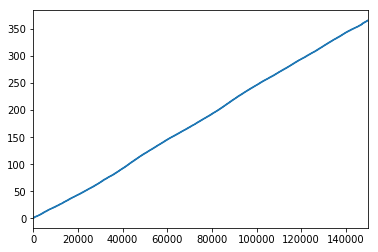

In [15]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
date_plot = date_s2.sort_values()
date_plot.head()
date_plot.index = range(len(date_s2.index))
date_plot.head()
date_plot.plot()

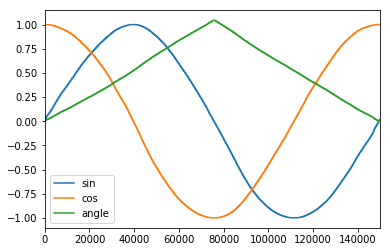

In [16]:
#date_plot['sin_time'] = np.sin(2*np.pi*date_plot['DT_ACCDN']/365)
date_df = pd.DataFrame({
    'date':date_plot
})
date_df.head()
date_df['sin'] = np.sin(2*np.pi*date_df['date']/365)
date_df['cos'] = np.cos(2*np.pi*date_df['date']/365)
date_df['angle'] = np.arccos(date_df.cos) /3
date_df.drop('date', axis=1).plot()

In [17]:
heure_s = df['HEURE_ACCDN'].replace('Non précisé', '') \
    .apply(lambda x: x.split(':')[0]).replace('', np.nan).apply(float)
heure_s.head()

0   NaN  
1    15.0
2    8.0 
3    9.0 
4   NaN  
Name: HEURE_ACCDN, dtype: float64

In [30]:
gravite_s = df['GRAVITE'].replace({
    'Dommages matériels inférieurs au seuil de rapportage': 0,
    'Dommages matériels seulement': 1,
    'Léger': 2, 
    'Grave': 3, 
    'Mortel': 4
})
gravite_s.head()

0    0
1    1
2    0
3    0
4    1
Name: GRAVITE, dtype: int64

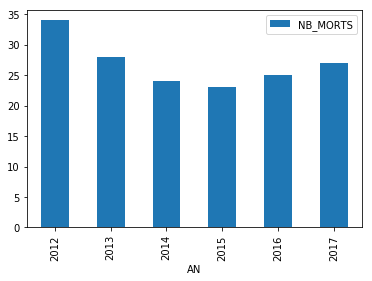

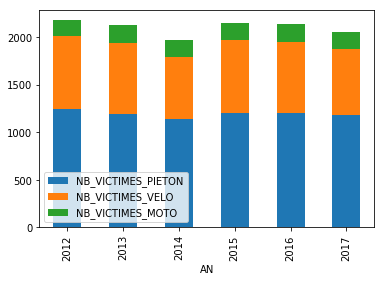

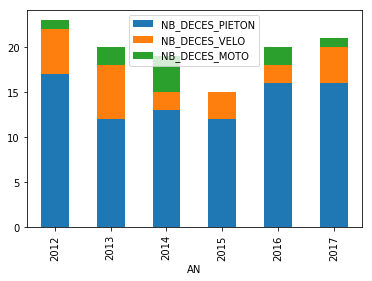

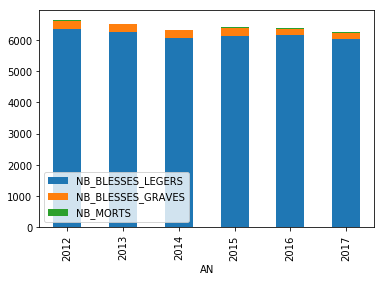

In [61]:
viz_df = (df[['AN', 'NB_MORTS',
                'NB_BLESSES_GRAVES',
                'NB_BLESSES_LEGERS',
                'NB_VICTIMES_TOTAL',
                'NB_DECES_PIETON',
                'NB_BLESSES_PIETON',
                'NB_VICTIMES_PIETON',
                'NB_DECES_MOTO',
                'NB_BLESSES_MOTO',
                'NB_DECES_VELO',
                'NB_BLESSES_VELO',
                'NB_VICTIMES_VELO',
                'NB_VICTIMES_MOTO']])
viz_df[['AN', 'NB_MORTS']].groupby('AN').sum().plot(kind='bar')
viz_df[['AN', 'NB_VICTIMES_PIETON', 'NB_VICTIMES_VELO', 'NB_VICTIMES_MOTO']].groupby('AN').sum().plot(kind='bar', stacked=True)
viz_df[['AN', 'NB_DECES_PIETON', 'NB_DECES_VELO', 'NB_DECES_MOTO']].groupby('AN').sum().plot(kind='bar', stacked=True)
viz_df[['AN', 'NB_BLESSES_LEGERS', 'NB_BLESSES_GRAVES', 'NB_MORTS']].groupby('AN').sum().plot(kind='bar', stacked=True)

In [80]:
reg_s = df['REG_ADM'].replace(np.nan, '') \
    .apply(lambda name: name.split('(')[1].replace(')','') if len(name) > 0 else name) \
    .replace('', np.nan).apply(float)
reg_s.head()

0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: REG_ADM, dtype: float64